In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import torch

In [8]:
x = torch.Tensor([0,1,5,3,4]).cuda()
x

tensor([0., 1., 5., 3., 4.], device='cuda:0')

In [9]:
# Epsilon-greedy action selection
def f(eps):
    action_probs = x[1:]
    if random.random() > eps:
        return np.argmax(action_probs.cpu().data.numpy())
    else:
        return random.choice(np.arange(len(action_probs)))

In [10]:
f(0)

1

In [11]:
x[0:].argmax().item()

2

In [24]:
eps_start = 1.0
eps_end = 0.01
eps_decay = 0.999925

In [25]:
eps = eps_start
epss = [eps]
for _ in range(100000):
    eps = max(eps_end, eps*eps_decay)
    epss.append(eps)

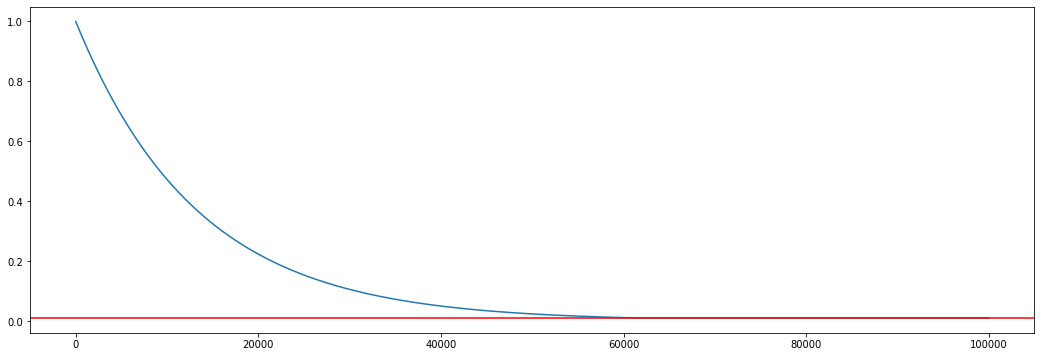

In [26]:
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(epss)
ax.axhline(0.01, c='r');

In [192]:
action_probs = torch.Tensor([0.1, 0, 0.2, 0, 0, 0.7])
p = np.ones(len(action_probs))
p[action_probs == 0] = 0
p /= p.sum()
p

array([0.33333333, 0.        , 0.33333333, 0.        , 0.        ,
       0.33333333])

In [227]:
A1 = np.array([np.random.choice(np.arange(len(action_probs)), p=p) for _ in range(10000)])
A2 = np.array([np.random.choice(np.arange(len(action_probs)), p=action_probs) for _ in range(10000)])
pd.Series(A1).value_counts(), pd.Series(A2).value_counts()

(0    3376
 5    3360
 2    3264
 dtype: int64,
 5    6941
 2    2081
 0     978
 dtype: int64)

In [243]:
np.random.random()

0.6415267472303934